# ***Explore & Analyiz Data***

In [159]:
#Importing Libraries

import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Feature engineering
from sklearn.feature_selection import mutual_info_regression

#For Fitting
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [160]:
df=pd.read_csv("assignment2dataset.csv")

In [161]:
df.shape

(10000, 6)

In [162]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [163]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [165]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [166]:
df.duplicated().sum()

127

In [167]:
df=df.drop_duplicates() #drop duplicates

In [168]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [169]:
df['Extracurricular Activities'].value_counts()

No     4986
Yes    4887
Name: Extracurricular Activities, dtype: int64

In [170]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])

In [171]:
# check outliers
columns = [ 'Hours Studied', 'Previous Scores', 
            'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')

Number of outliers in Hours Studied: 0
Number of outliers in Previous Scores: 0
Number of outliers in Sleep Hours: 0
Number of outliers in Sample Question Papers Practiced: 0
Number of outliers in Performance Index: 0


# ***Visualize Data***

<Axes: xlabel='Extracurricular Activities', ylabel='count'>

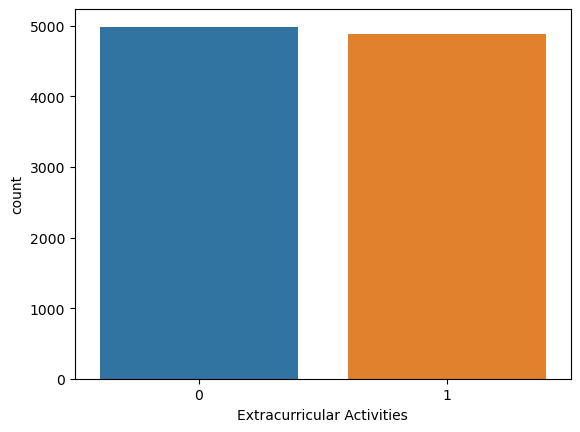

In [172]:
sns.countplot(x='Extracurricular Activities', data = df)

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Density'>

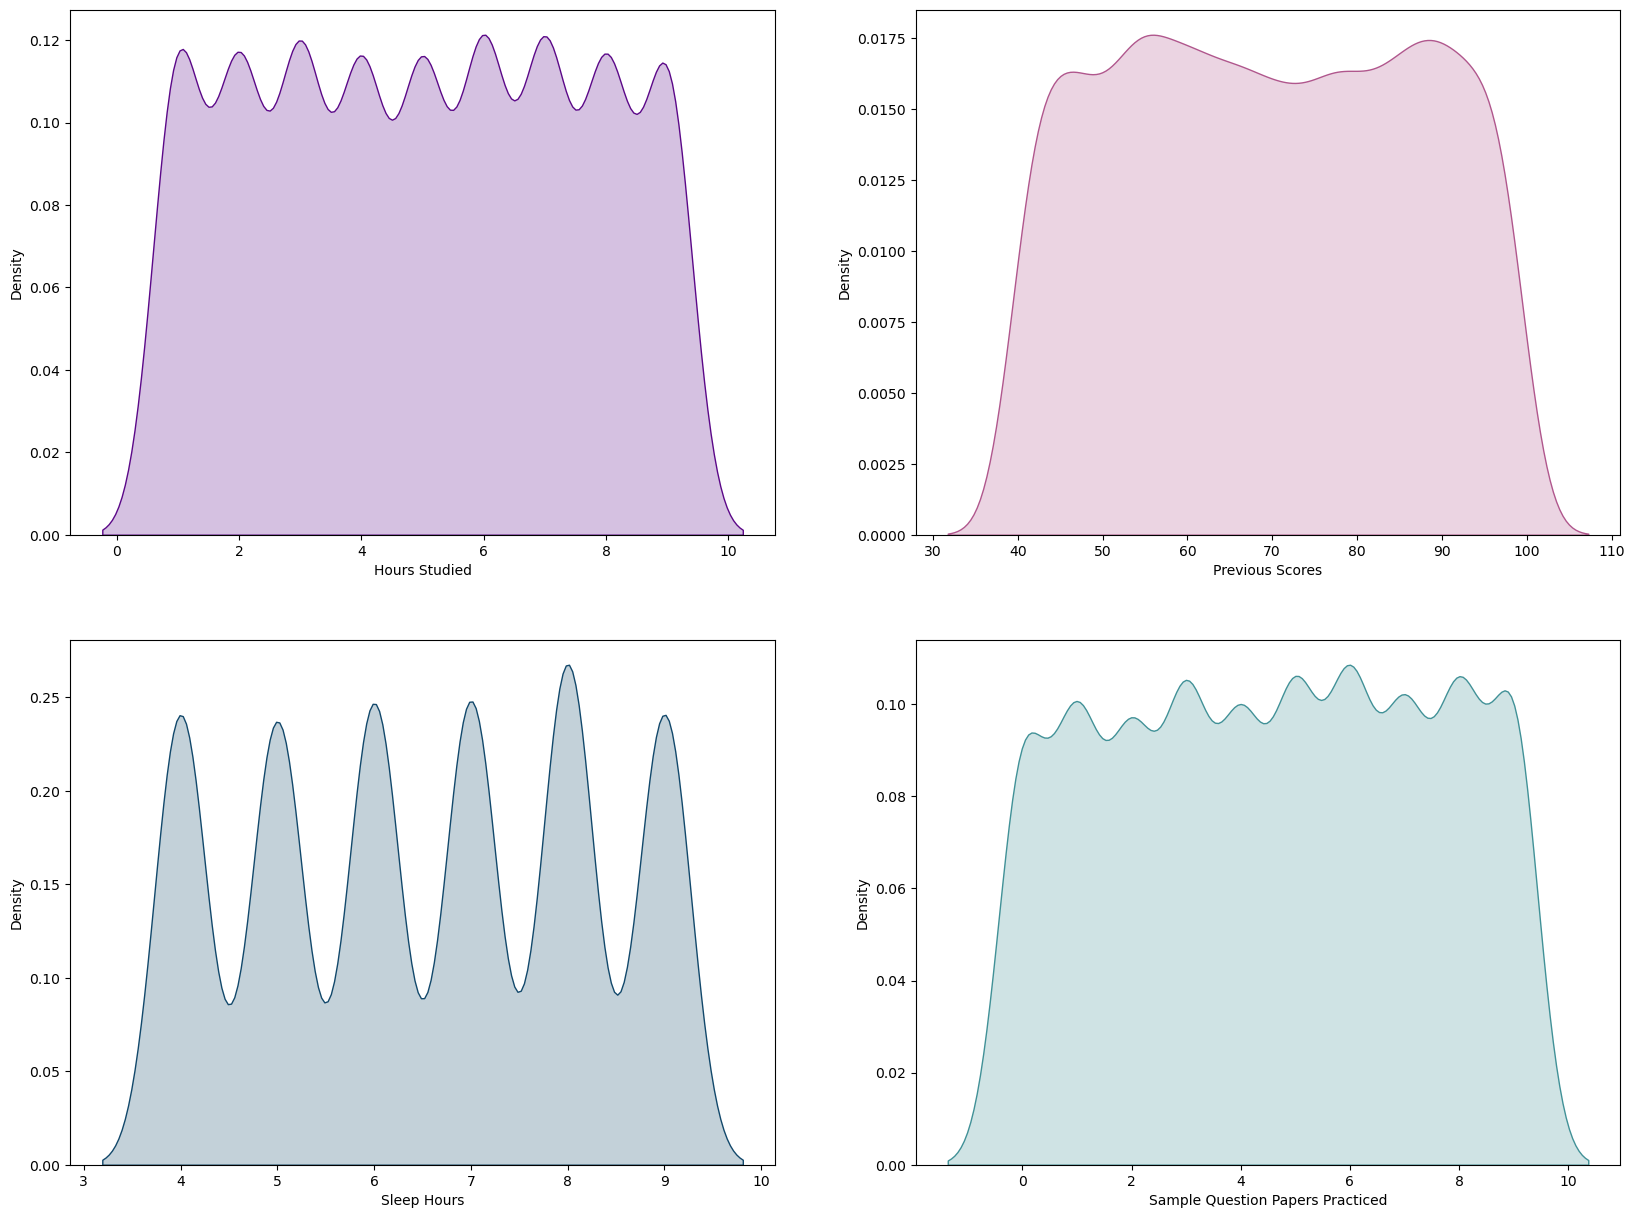

In [173]:
##histogram
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sns.kdeplot(df['Hours Studied'], shade=True, color="#5B0888")
plt.subplot(2, 2, 2)
sns.kdeplot(df['Previous Scores'], shade=True, color="#B0578D")
plt.subplot(2, 2, 3)
sns.kdeplot(df['Sleep Hours'], shade=True, color="#12486B")
plt.subplot(2, 2, 4)
sns.kdeplot(df['Sample Question Papers Practiced'], shade=True, color="#419197")

<Axes: >

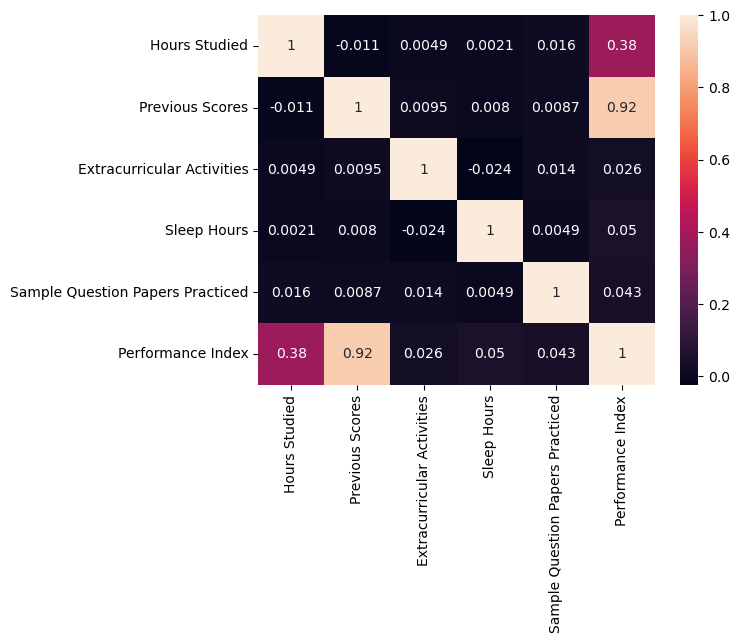

In [174]:
# Heatmap
sns.heatmap(df.corr(), annot=True)

***Data doesn't have Nulls OR Outliers & we drop duplicates AND make encoding  ,So data is cleaning now.***

# Feature Extraction

In [175]:
df['Wasted_hours']=24-(df['Sleep Hours']+df['Hours Studied'])

# Feature Scaling

In [176]:
#scaling data in range of 0 to 1
scaler = MinMaxScaler()

In [177]:
data=df.copy()

In [178]:
columns_to_scale = ['Hours Studied', 'Previous Scores', 'Sleep Hours','Sample Question Papers Practiced', 'Performance Index','Wasted_hours']
# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

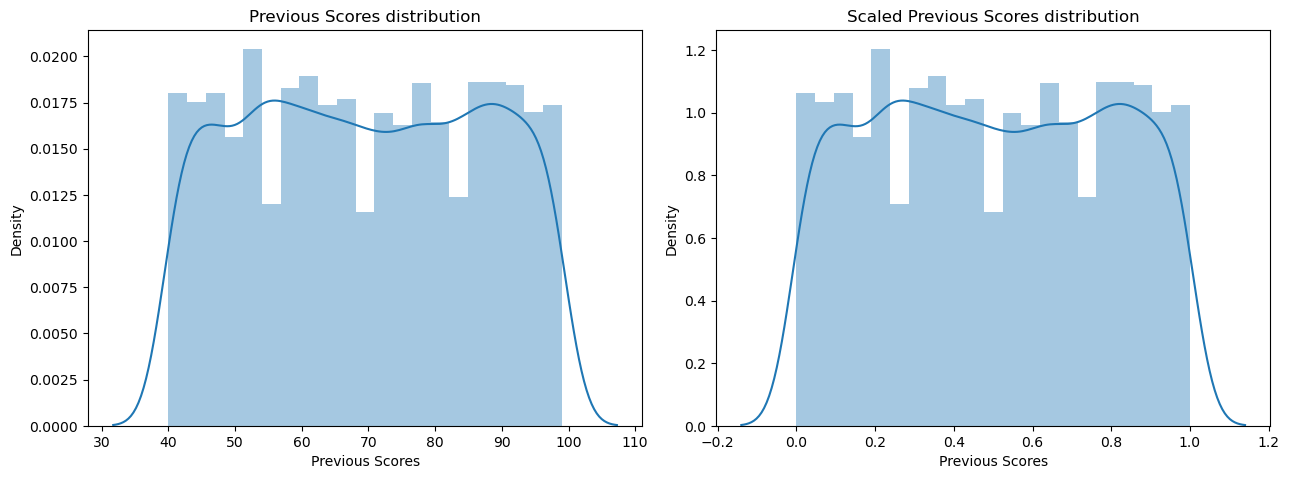

In [179]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Previous Scores'])
plt.title('Previous Scores distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Previous Scores'])
plt.title('Scaled Previous Scores distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

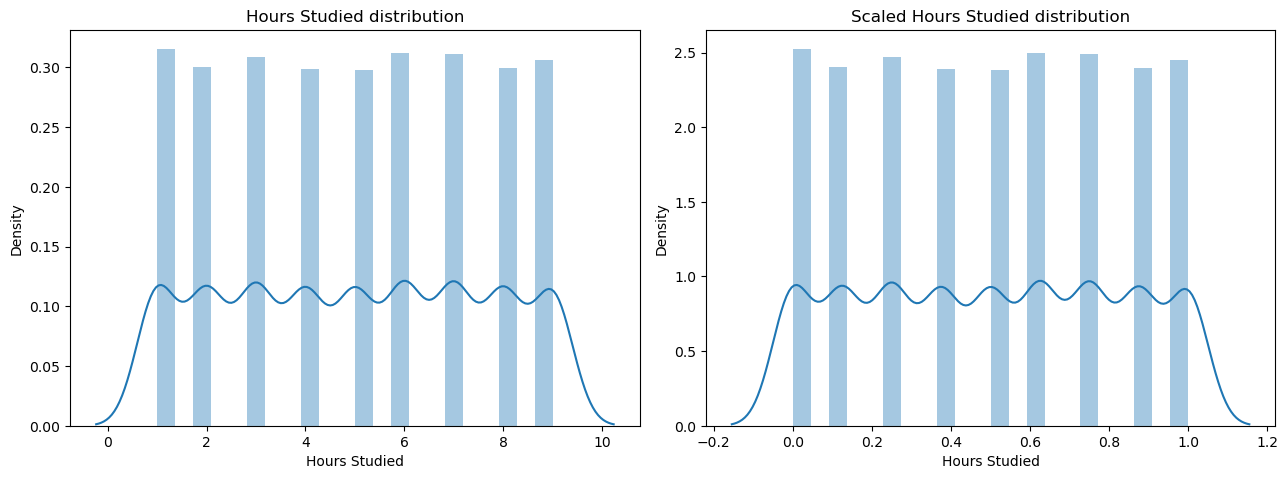

In [180]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Hours Studied'])
plt.title('Hours Studied distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Hours Studied'])
plt.title('Scaled Hours Studied distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()
     

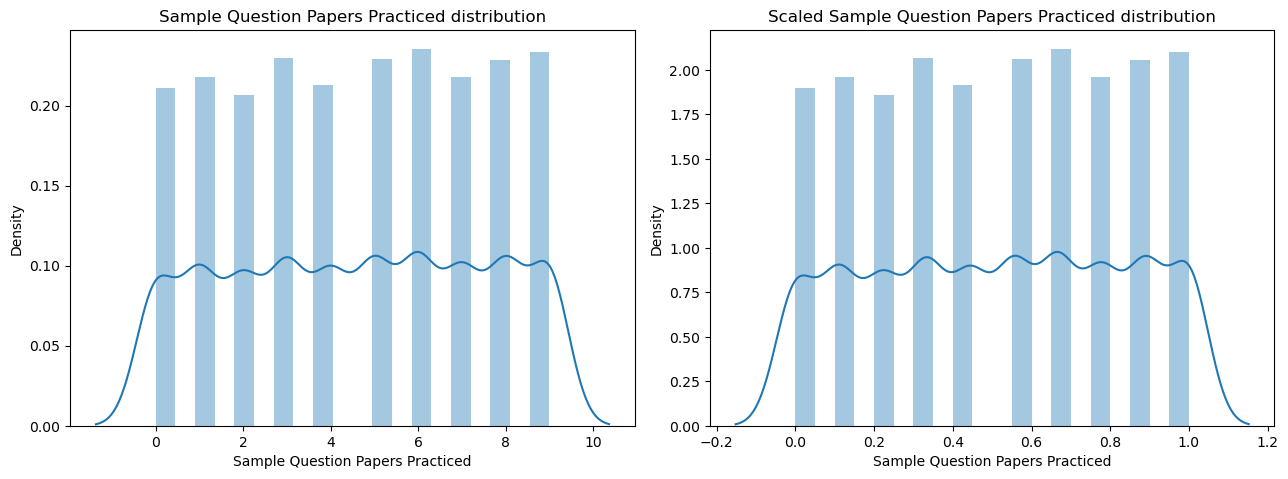

In [181]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Sample Question Papers Practiced'])
plt.title('Sample Question Papers Practiced distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Sample Question Papers Practiced'])
plt.title('Scaled Sample Question Papers Practiced distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

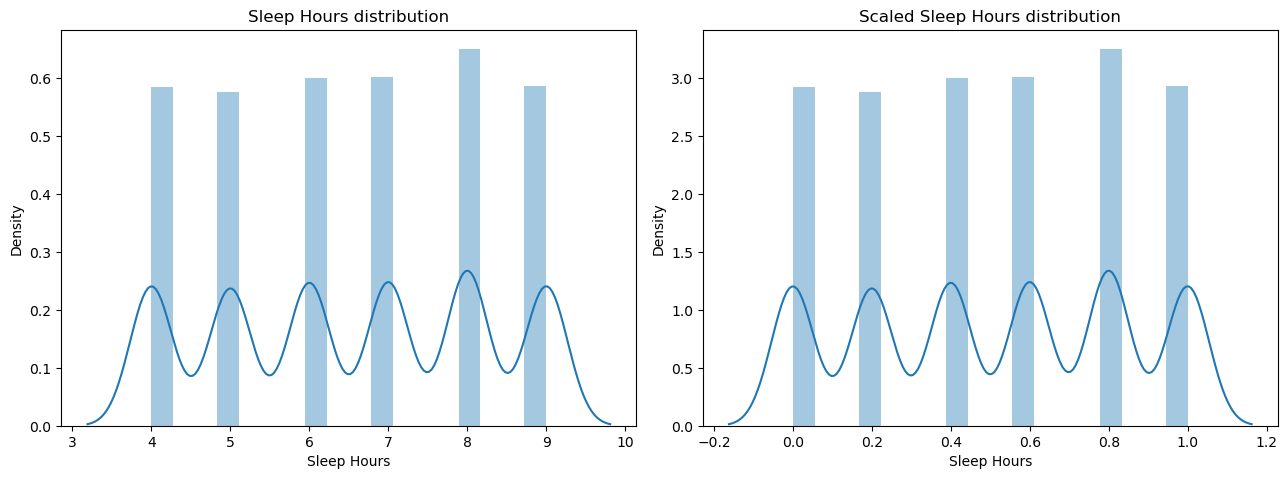

In [182]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Sleep Hours'])
plt.title('Sleep Hours distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Sleep Hours'])
plt.title('Scaled Sleep Hours distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

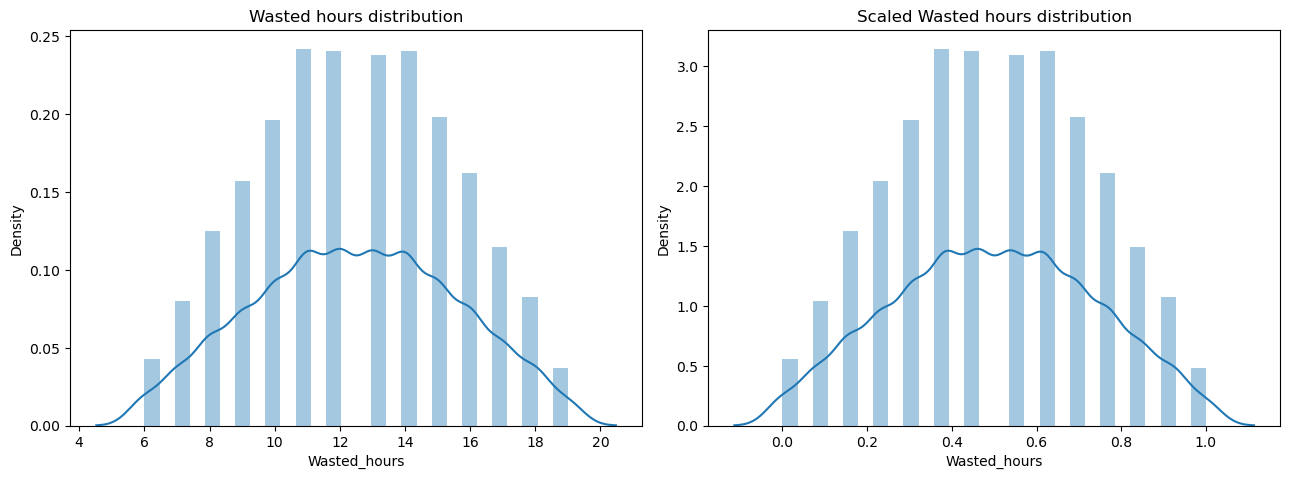

In [183]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Wasted_hours'])
plt.title('Wasted hours distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Wasted_hours'])
plt.title('Scaled Wasted hours distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

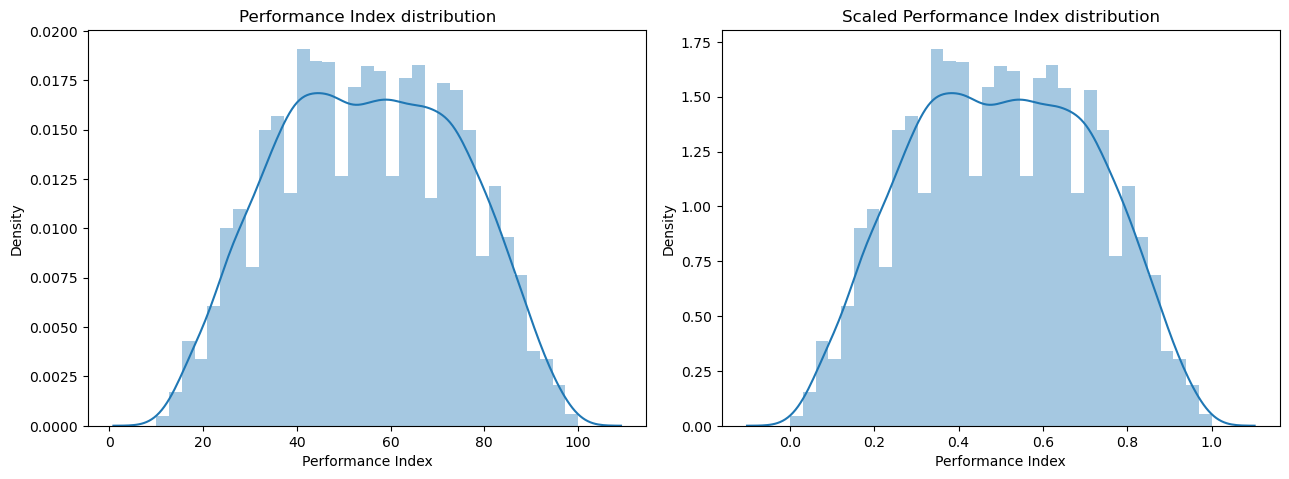

In [184]:
plt.figure(figsize=(13, 9))

# First subplot
plt.subplot(2, 2, 1)
sns.distplot(data['Performance Index'])
plt.title('Performance Index distribution')

# Second subplot
plt.subplot(2, 2, 2)
sns.distplot(df['Performance Index'])
plt.title('Scaled Performance Index distribution')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

# Features Selection

There are several techniques for feature selection, including:

***Filter Methods:*** These methods rank features based on **statistical measures** like correlation, mutual information, chi-square test, or feature importance scores (e.g., using decision trees or random forests). Features are selected or removed based on their scores, without involving the learning algorithm.

SO we will use correlation & feature importance

In [185]:
X=df.drop(columns=['Performance Index'])
Y=df['Performance Index']

In [186]:
mutual_info = mutual_info_regression(X,Y)
feature_importance = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print(feature_importance)

Previous Scores                     0.945277
Hours Studied                       0.135614
Wasted_hours                        0.108519
Extracurricular Activities          0.010941
Sleep Hours                         0.004133
Sample Question Papers Practiced    0.000000
dtype: float64


In [187]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Wasted_hours
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332,-0.836607
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135,0.004550
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075,0.009059
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352,-0.549585
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436,-0.015838
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000,-0.341151
Wasted_hours,-0.836607,0.004550,0.009059,-0.549585,-0.015838,-0.341151,1.000000


***We conclude that `Previous Scores` & `Hours Studied` & `Wasted_hours` Features have***

# ***Prepare Data***

## *Split Data into Features and target*

In [188]:
X=df    # in multi features , we will use all features
X1 = df['Previous Scores']
X2 = df['Hours Studied']
X3 = df['Sleep Hours']
X4=df['Wasted_hours']
X5= df['Sample Question Papers Practiced']
X6=df['Extracurricular Activities']
Y = df['Performance Index']

## *Reshaping Data into Numpy Array*

In [189]:
X1 = X1.to_numpy().reshape(X1.shape[0], -1)
X2 = X2.to_numpy().reshape(X2.shape[0], -1)
X3 = X3.to_numpy().reshape(X3.shape[0], -1)
X4 = X4.to_numpy().reshape(X4.shape[0], -1)
X5 = X5.to_numpy().reshape(X5.shape[0], -1)
X6 = X6.to_numpy().reshape(X5.shape[0], -1)
Y = Y.to_numpy().reshape(Y.shape[0], -1)

print("X Shape: ",X.shape)
print("X1 Shape: ",X1.shape)
print("X2 Shape: ",X2.shape)
print("X3 Shape: ",X3.shape)
print("X4 Shape: ",X4.shape)
print("X5 Shape: ",X5.shape)
print("X6 Shape: ",X6.shape)
print("Y shape: ",Y.shape)

X Shape:  (9873, 7)
X1 Shape:  (9873, 1)
X2 Shape:  (9873, 1)
X3 Shape:  (9873, 1)
X4 Shape:  (9873, 1)
X5 Shape:  (9873, 1)
X6 Shape:  (9873, 1)
Y shape:  (9873, 1)


# ***Polynomial Regression for single feature***

In [190]:
from PolynomialRegressionAlgorithm import train 
from PolynomialRegressionAlgorithm import predict
from PolynomialRegressionAlgorithm import train
from PolynomialRegressionAlgorithm import r2_score

## *Previous Scores Feture*

In [191]:
w_trained, b_trained, losses_trained = train(X1,Y,batch_size=100,degrees=[2],epochs=1000,lr=0.01)
y_hat = predict(X1, w_trained, b_trained, [2])

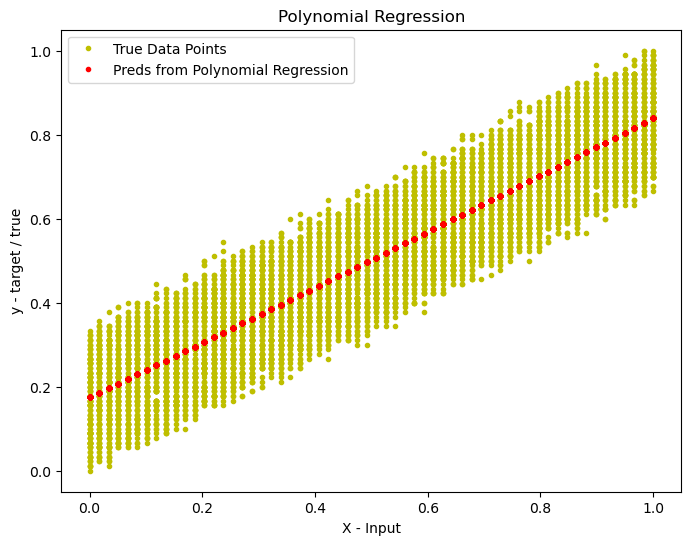

In [192]:
fig = plt.figure(figsize=(8,6))
plt.plot(X1,Y, 'y.')
plt.plot(X1, y_hat, 'r.')
plt.legend(["True Data Points", "Preds from Polynomial Regression"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

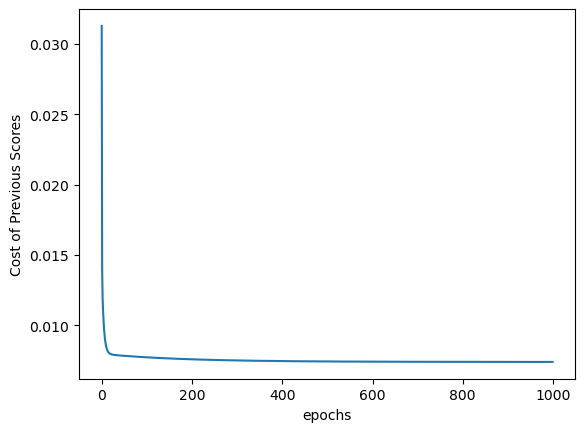

In [193]:
Previous_Scores_loss=losses_trained
plt.plot(losses_trained)
plt.xlabel('epochs')
plt.ylabel('Cost of Previous Scores')
plt.show()

In [194]:
y_pred = predict(X1, w_trained, b_trained, [2])
score1 = r2_score(Y, y_pred)
print("R2 score:", score1)

R2 score: 0.8374204452611422


## *Hours Studied Feature*

In [195]:
w_trained, b_trained, losses_trained = train(X2,Y,batch_size=100,degrees=[2],epochs=1000,lr=0.01)
y_hat = predict(X2, w_trained, b_trained, [2])

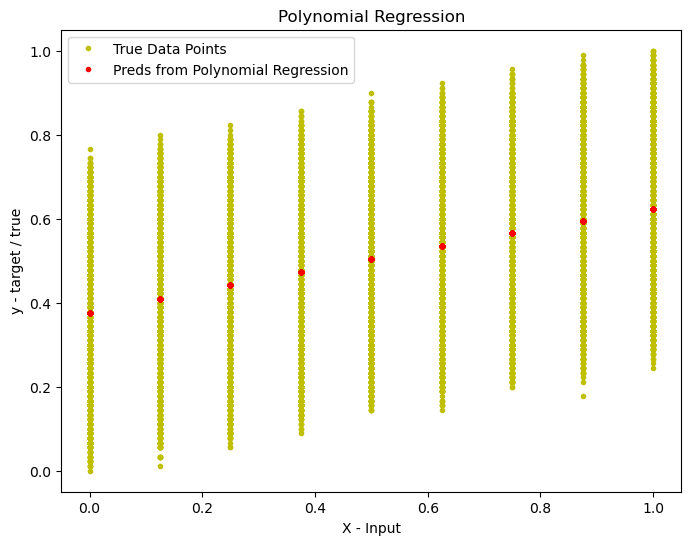

In [196]:
fig = plt.figure(figsize=(8,6))
plt.plot(X2,Y, 'y.')
plt.plot(X2, y_hat, 'r.')
plt.legend(["True Data Points", "Preds from Polynomial Regression"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

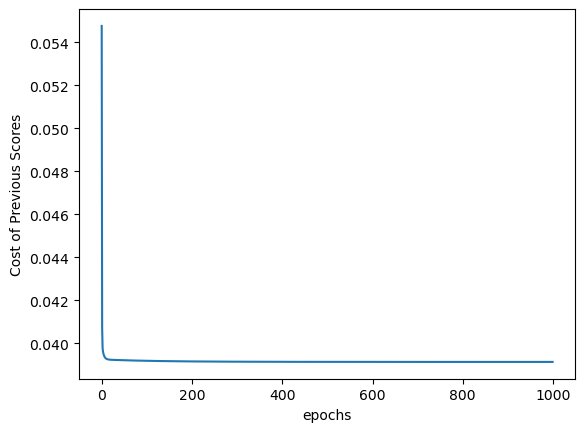

In [197]:
Hours_Studied_loss=losses_trained
plt.plot(losses_trained)
plt.xlabel('epochs')
plt.ylabel('Cost of Previous Scores')
plt.show()

In [198]:
y_pred = predict(X2, w_trained, b_trained, [2])
score2 = r2_score(Y, y_pred)
print("R2 score:", score2)

R2 score: 0.14099047102104711


## *Sleep Hours Feature*

In [199]:
w_trained, b_trained, losses_trained = train(X3,Y,batch_size=100,degrees=[2],epochs=1000,lr=0.01)
y_hat = predict(X3, w_trained, b_trained, [2])

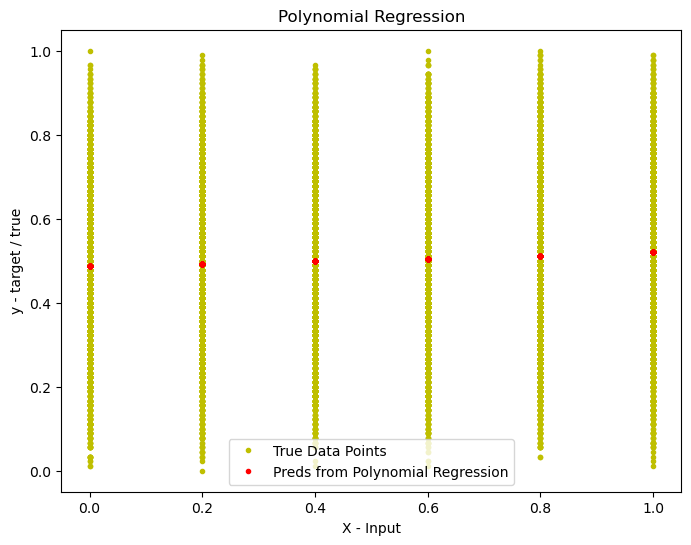

In [200]:
fig = plt.figure(figsize=(8,6))
plt.plot(X3,Y, 'y.')
plt.plot(X3, y_hat, 'r.')
plt.legend(["True Data Points", "Preds from Polynomial Regression"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

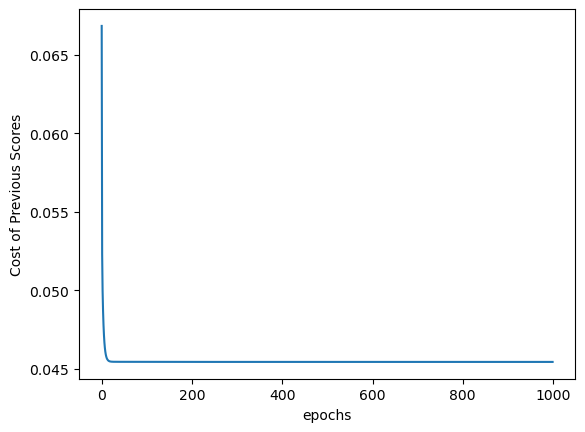

In [201]:
Sleep_Hours_loss=losses_trained
plt.plot(losses_trained)
plt.xlabel('epochs')
plt.ylabel('Cost of Previous Scores')
plt.show()

In [202]:
y_pred = predict(X3, w_trained, b_trained, [2])
score3 = r2_score(Y, y_pred)
print("R2 score:", score3)

R2 score: 0.00255772697100487


## *Wasted Hours Feature*

In [203]:
w_trained, b_trained, losses_trained = train(X4,Y,batch_size=100,degrees=[2],epochs=1000,lr=0.01)
y_hat = predict(X4, w_trained, b_trained, [2])

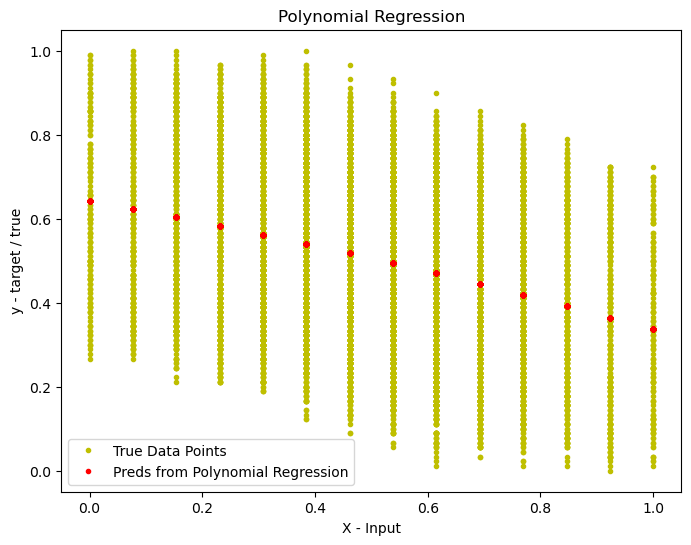

In [204]:
fig = plt.figure(figsize=(8,6))
plt.plot(X4,Y, 'y.')
plt.plot(X4, y_hat, 'r.')
plt.legend(["True Data Points", "Preds from Polynomial Regression"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

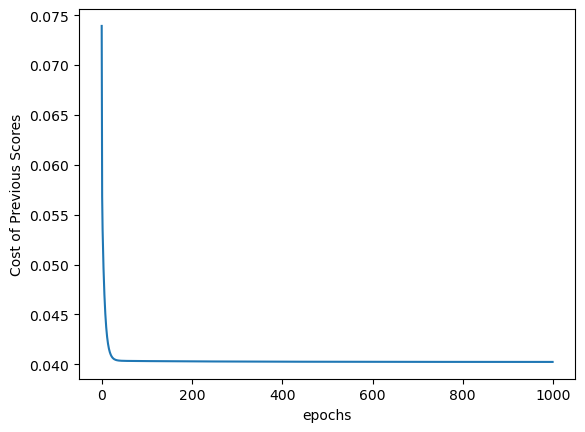

In [205]:
Wasted_Hours_loss=losses_trained
plt.plot(losses_trained)
plt.xlabel('epochs')
plt.ylabel('Cost of Previous Scores')
plt.show()

In [206]:
y_pred = predict(X4, w_trained, b_trained, [2])
score4 = r2_score(Y, y_pred)
print("R2 score:", score4)

R2 score: 0.11648494874955839


## *Sample Question Papers Practiced Feature*

In [207]:
w_trained, b_trained, losses_trained = train(X5,Y,batch_size=100,degrees=[2],epochs=1000,lr=0.01)
y_hat = predict(X5, w_trained, b_trained, [2])

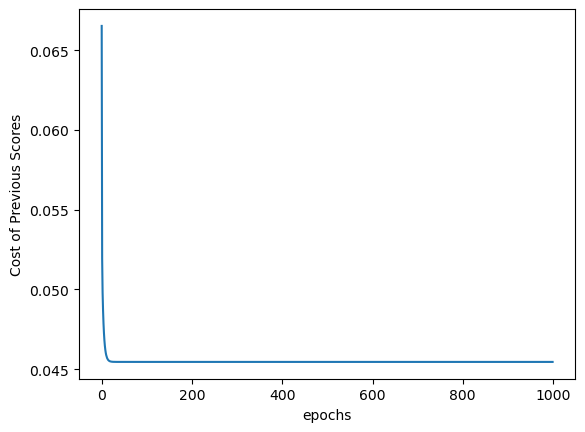

In [208]:
Sample_Question_Papers_Practiced_loss=losses_trained
plt.plot(losses_trained)
plt.xlabel('epochs')
plt.ylabel('Cost of Previous Scores')
plt.show()

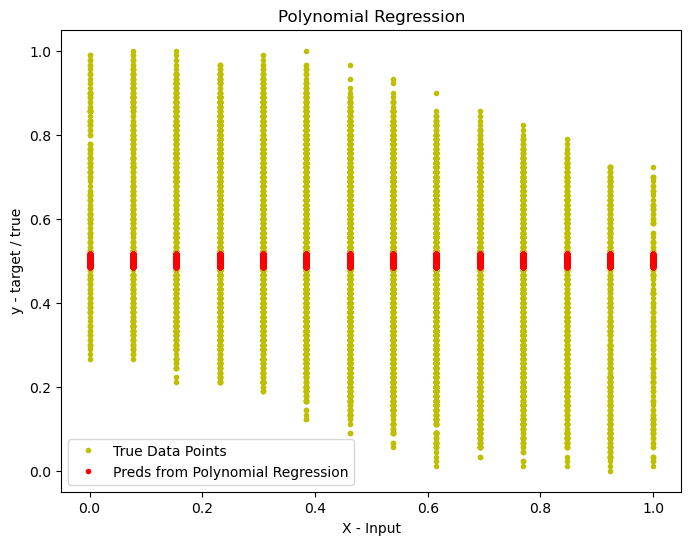

In [209]:
fig = plt.figure(figsize=(8,6))
plt.plot(X4,Y, 'y.')
plt.plot(X4, y_hat, 'r.')
plt.legend(["True Data Points", "Preds from Polynomial Regression"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

In [210]:
y_pred = predict(X4, w_trained, b_trained, [2])
score5 = r2_score(Y, y_pred)
print("R2 score:", score5)

R2 score: -0.023379721336555415


## *Extracurricular Activities Feature*

In [211]:
w_trained, b_trained, losses_trained = train(X6,Y,batch_size=100,degrees=[2],epochs=1000,lr=0.01)
y_hat = predict(X6, w_trained, b_trained, [2])

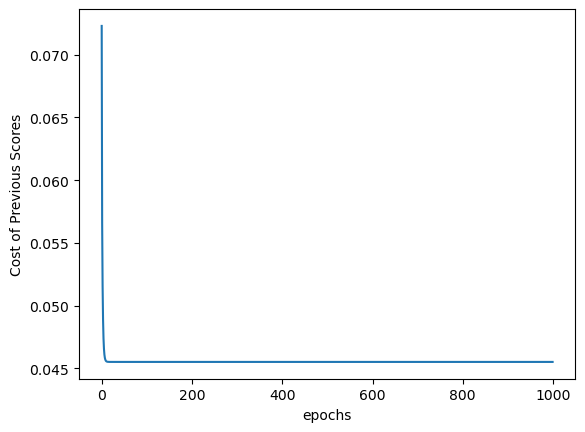

In [212]:
Extracurricular_Activities_loss=losses_trained
plt.plot(losses_trained)
plt.xlabel('epochs')
plt.ylabel('Cost of Previous Scores')
plt.show()

In [213]:
y_pred = predict(X6, w_trained, b_trained, [2])
score6 = r2_score(Y, y_pred)
print("R2 score:", score6)

R2 score: 0.0006616455855924519


# ***Polynomial Regression with Multi Features***

In [214]:
w_trained, b_trained, losses_trained = train(X,Y,batch_size=100,degrees=[4],epochs=1000,lr=0.01)
y_hat = predict(X, w_trained, b_trained, [4])

In [219]:
y_pred = predict(X, w_trained, b_trained, [2])
score = r2_score(Y, y_pred)
print("R2 score:", score)

R2 score: 0.9972608016385841


# ***Conclusion***

In [218]:
mylist={'feature number':['Previous Scores', 'Hours Studied','Sleep Hours','Sample Question Papers Practiced','Extracurricular Activities','Wasted Hours'],
       'cost':[Previous_Scores_loss[-1],Hours_Studied_loss[-1],Sleep_Hours_loss[-1],Wasted_Hours_loss[-1],Sample_Question_Papers_Practiced_loss[-1],Extracurricular_Activities_loss[-1]],
       'r2_score':[score1,score2,score3,score4,score5,score6]}
list_df=pd.DataFrame(mylist)
list_df

,feature number,cost,r2_score
0,Previous Scores,0.007405,0.837420
1,Hours Studied,0.039125,0.140990
2,Sleep Hours,0.045431,0.002558
3,Sample Question Papers Practiced,0.040242,0.116485
4,Extracurricular Activities,0.045460,-0.023380
5,Wasted Hours,0.045517,0.000662


# ***Conclusion:*** `Multi Features` accurecy is **99.72%** AND `Previous Scores` accurecy is **83.74%**